# Alcohol Reviews Analysis

In this challenge, we will be finding out what is objectively the best alcohol that you can get based off multiple factors. First, we will find the 3 best of all three groups and then find the 3 overall best picks between the three groups.

## Basis of these decisions
Going to be comparing Price, Rating/Rate Count, (R/RC)/Price, Average ABV/ABV’s listed. 

Will break it down by  

Each beverage type: 

Finding Average Price 

Average Rating 

Average R/RC 

Average (R/RC)/Price 

And Average ABV/ABV’s listed. 

 

Going to compare them internally, find the 3 best of each

Then going to compare against each other and find the best 3 overall.



In [215]:
# Importing the required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import csv
from sklearn.linear_model import LinearRegression

In [216]:
Beer_data_df = pd.read_csv("beer_data.csv")
Spirits_data_df = pd.read_csv("spirits_data.csv")
Wine_data_df = pd.read_csv("wine_data.csv")

In [217]:
Beer_data_df.head()

,Unnamed: 0,Name,Country,Brand,Categories,Type,Tasting Notes,ABV,IBU,Calories Per Serving (12 OZ/0.35L),Carbs Per Serving (12 OZ/0.35L),Food Pairing,Suggested Serving Temperature,Rating,Rate Count,Price,Volume,Description
0,304,Mikkeller Hop On Drink’In Berliner,Denmark,Mikkeller,"ALE, Berliner Weisse, Sour Wild Ale",Craft Beer,NaN,2.80%,NaN,NaN,NaN,NaN,45-50° F,5,1,$4.44,NaN,Dry-hopped version of the regular Drink'in Ber...
1,171,Evil Twin Sour Bikini,United States,Evil Twin,"ALE, Sour Wild Ale",Craft Beer,NaN,3%,NaN,NaN,NaN,NaN,45-50° F,5,1,$11.99,NaN,"Named after atom bomb test grounds, designed b..."
2,319,Mikkeller Brand New Normal,United States,Mikkeller,"ALE, Berliner Weisse, Sour Wild Ale",Craft Beer,NaN,3.20%,NaN,NaN,NaN,NaN,45-50° F,5,1,$12.99,NaN,NaN
3,181,Evil Twin Sanguinem Aurantiaco,United States,Evil Twin,"ALE, Sour Wild Ale",Craft Beer,NaN,3.25%,NaN,NaN,NaN,NaN,45-50° F,5,1,$10.99,NaN,Sour ale with blood orange added.
4,317,Mikkeller Hallo Ich Bin Berliner Watermelon,Denmark,Mikkeller,"ALE, Berliner Weisse, Sour Wild Ale",Craft Beer,NaN,3.40%,NaN,NaN,NaN,NaN,45-50° F,5,1,$4.99,NaN,Berliner-style Weisse beer brewed with Watermelon


In [218]:
Spirits_data_df.head()

,Unnamed: 0,Name,Country,Brand,Categories,Tasting Notes,ABV,Base Ingredient,Years Aged,Rating,Rate Count,Price,Volume,Description
0,342,Gordon & MacPhail Glen Grant 1965 42 Year,United Kingdom,Gordon MacPhail,"Scotch Whisky, Whiskey",NaN,40%,NaN,42.0,5.0,1,$20.00,NaN,This Rare Vintage Glen Grant was matured in re...
1,61,Dek Crave Chocolate Chili,United States,DeKuyper Liqueur,"Chocolate, Sweet Liqueur, Liqueur",NaN,15%,NaN,NaN,5.0,1,$10.00,NaN,NaN
2,159,Smirnoff Root Beer 100 proof,United States,Smirnoff Vodka,"American Vodka, Flavored Vodka, Vodka",NaN,50%,NaN,NaN,3.3,3,$8.00,NaN,Whether you sip it on the rocks or with soda a...
3,121,Bacardi Rum Grand Melon,Puerto Rico,Bacardi Rum,"Flavored Rum, Rum",NaN,35%,NaN,NaN,5.0,1,$7.99,NaN,NaN
4,115,Bacardi Wolf Berry,Puerto Rico,Bacardi Rum,"Flavored Rum, Rum",NaN,35%,NaN,NaN,5.0,1,$15.00,NaN,BACARDÍ® WOLF BERRY gets its unique flavor fro...


In [219]:
Wine_data_df.head()

,Unnamed: 0,Name,Country,Brand,Categories,Tasting Notes,ABV,Food Pairing,Suggested Glassware,Suggested Serving Temperature,Sweet-Dry Scale,Body,Rating,Rate Count,Price,Volume,Description
0,9,Block 537 Merlot Dry Creek,France,Vineyard Block Estate,"Merlot, Red Wine",NaN,13.90%,"Duck Game Bird, Tomatoes",Bordeaux Glass,60-65° F,Dry Wine,Medium,5.0,1,$20.99,NaN,"The wine is velvety and lush, with aromas and ..."
1,10,Block 049 Merlot,France,Vineyard Block Estate,"Merlot, Red Wine",NaN,14.50%,"Duck Game Bird, Tomatoes",Bordeaux Glass,60-65° F,Dry Wine,Medium,5.0,1,$21.99,NaN,Ripe and velvety on the palate. The aromas are...
2,23,Block 115 Arroyo Grande Valley Pinot Noir,United States,Vineyard Block Estate,"Pinot Noir, Red Wine",NaN,14%,"Fish - Meaty Oily, Duck Game Bird",Burgundy Bourgogne Glass,55-60° F,NaN,Light,5.0,1,$24.99,NaN,Bright fruit aromas offer a perfumed nose of w...
3,24,Block 664 Pinot Noir Pommard,France,Vineyard Block Estate,"Pinot Noir, Red Wine",NaN,13.50%,"Fish - Meaty Oily, Duck Game Bird",Burgundy Bourgogne Glass,55-60° F,NaN,Light,5.0,1,$25.99,NaN,Block 664 shows expertise in balancing power a...
4,29,Block 012 Red Wine Oak Knoll,United States,Vineyard Block Estate,"Red Blend, Red Wine",NaN,14.50%,NaN,NaN,NaN,NaN,NaN,5.0,1,$20.99,NaN,The Block 012 is a red blend from the Oak Knol...


## Find the best of the beer
Finding Average Price, 
Average Rating, 
Average R/RC, 
Average (R/RC)/Price, 
And Average ABV/ABV’s listed. 

In [220]:
Beer_data_df['Price'] = Beer_data_df['Price'].str.replace('$', '').astype(float)

c:\Users\jakes\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [221]:
Beer_data_df['Price'] = Beer_data_df['Price'].astype(float)

In [222]:
# Clean the ABV column by removing the percentage sign and converting to float
Beer_data_df['ABV'] = Beer_data_df['ABV'].str.replace('%', '').astype(float)


In [223]:
#Write code to find the Average Price of the Beer
#CODE HERE
# Calculate the average price of beer
beer_avg_price = Beer_data_df["Price"].mean()
print("The average price of beer is:", beer_avg_price)

The average price of beer is: 15.12709030100325


In [224]:
#Write code to find the Average Rating of the Beer
#CODE HERE
beer_avg_rating = Beer_data_df["Rating"].mean()
print("The average rating of beer is:", beer_avg_rating)


The average rating of beer is: 5.0


In [225]:
#Write code to find the Average RC of the Beer
#CODE HERE
beer_avg_rc= Beer_data_df["Rate Count"].mean()
print("The average rate count of beer is:", beer_avg_rc)

The average rate count of beer is: 1.1070234113712374


In [226]:
#Write code to find the Average R/RC of the Beer
#CODE HERE
beer_avg_rrc = beer_avg_rating / beer_avg_rc
print("The average rating/rate count of beer is:", beer_avg_rrc)

The average rating/rate count of beer is: 4.516616314199396


In [227]:
#Write code to find the Average (R/RC)/Price of the Beer
#CODE HERE
beer_worth = beer_avg_rrc / beer_avg_price
print("The worth of the beer is:", beer_worth)

The worth of the beer is: 0.29857799645050365


In [228]:
#Write code to find the Average ABV of the Beer
#CODE HERE
beer_avg_abv = Beer_data_df["ABV"].mean()
print("The average ABV count of beer is:", beer_avg_abv)

The average ABV count of beer is: 8.022909698996658


#How to define the best chance of get a beer is based off the (R/RC)/Price of Beer to have a quantitative number to define how much money you spend per "star/1 rating". For beer that is 1 dollar to .299 stars.

## Find the best of the beers after Machine Learning
Finding Average Price, 
Average Rating, 
Average R/RC, 
Average (R/RC)/Price, 
And Average ABV listed. 

In [229]:
#Create copy of table for the machine to register new beers
combined_data_1_df = Beer_data_df.copy()


In [230]:
# Define the characteristics of the new beers
num_new_beers = 700
beer_names = ['Beer A', 'Beer B', 'Beer C', 'Beer D', 'Beer E']
countries = ['Country A', 'Country B', 'Country C']
brands = ['Brand A', 'Brand B', 'Brand C']
categories = ['Category A', 'Category B', 'Category C']
types = ['Type A', 'Type B', 'Type C']
tasting_notes = ['Note A', 'Note B', 'Note C']
abv_range = (3.0, 12.0)  # Alcohol by Volume range (minimum, maximum)
ibu_range = (0, 100)  # IBU (International Bitterness Units) range (minimum, maximum)
calories_range = (100, 300)  # Calories per serving range (minimum, maximum)
carbs_range = (0, 30)  # Carbs per serving range (minimum, maximum)
food_pairing = ['Food Pairing A', 'Food Pairing B', 'Food Pairing C']
serving_temp_list = ['Cold', 'Chilled', 'Room temperature']
rating_range = (1.0, 5.0)  # Rating range (minimum, maximum)
rate_count_range = (10, 500)  # Rate Count range (minimum, maximum)
price_range = (1.0, 20.0)  # Price range (minimum, maximum)
volume = '12 OZ/0.35L'
description = 'Beer description'


In [231]:
# Generate random beers
new_beers = []
for _ in range(num_new_beers):
    beer_name = np.random.choice(beer_names)
    country = np.random.choice(countries)
    brand = np.random.choice(brands)
    category = np.random.choice(categories)
    beer_type = np.random.choice(types)
    tasting_note = np.random.choice(tasting_notes)
    abv = np.round(np.random.uniform(abv_range[0], abv_range[1]))
    ibu = np.random.randint(ibu_range[0], ibu_range[1])
    calories = np.random.randint(calories_range[0], calories_range[1])
    carbs = np.round(np.random.uniform(carbs_range[0], carbs_range[1]))
    food_pair = np.random.choice(food_pairing)
    serving_temp = np.random.choice(serving_temp_list)
    rating = np.round(np.random.uniform(rating_range[0], rating_range[1]), 1)
    rate_count = np.random.randint(rate_count_range[0], rate_count_range[1])
    price = np.round(np.random.uniform(price_range[0], price_range[1]), 2)
    
    new_beers.append([
        beer_name, country, brand, category, beer_type, tasting_note, abv, ibu, calories, carbs,
        food_pair, serving_temp, rating, rate_count, price, volume, description
    ])

In [232]:
# Create a new DataFrame with the generated beers
new_beers_df = pd.DataFrame(
    new_beers,
    columns=['Name', 'Country', 'Brand', 'Categories', 'Type', 'Tasting Notes', 'ABV', 'IBU',
             'Calories Per Serving (12 OZ/0.35L)', 'Carbs Per Serving (12 OZ/0.35L)', 'Food Pairing',
             'Suggested Serving Temperature', 'Rating', 'Rate Count', 'Price', 'Volume', 'Description']
)

In [233]:
new_beers_df.head()

,Name,Country,Brand,Categories,Type,Tasting Notes,ABV,IBU,Calories Per Serving (12 OZ/0.35L),Carbs Per Serving (12 OZ/0.35L),Food Pairing,Suggested Serving Temperature,Rating,Rate Count,Price,Volume,Description
0,Beer E,Country C,Brand A,Category B,Type C,Note B,9.0,93,222,19.0,Food Pairing A,Room temperature,1.4,64,6.11,12 OZ/0.35L,Beer description
1,Beer D,Country A,Brand A,Category A,Type B,Note B,12.0,4,120,27.0,Food Pairing A,Room temperature,3.2,332,17.21,12 OZ/0.35L,Beer description
2,Beer C,Country A,Brand A,Category C,Type C,Note C,3.0,0,175,9.0,Food Pairing A,Room temperature,3.9,373,5.22,12 OZ/0.35L,Beer description
3,Beer D,Country B,Brand A,Category B,Type A,Note C,11.0,66,271,9.0,Food Pairing A,Cold,2.1,280,17.51,12 OZ/0.35L,Beer description
4,Beer B,Country C,Brand A,Category C,Type C,Note A,10.0,23,171,8.0,Food Pairing A,Cold,2.8,451,16.05,12 OZ/0.35L,Beer description


In [234]:
#Find average price of new beers table
beers_average_price = new_beers_df['Price'].mean()
print("The average price of beers is:", beers_average_price)


The average price of beers is: 10.65488571428571


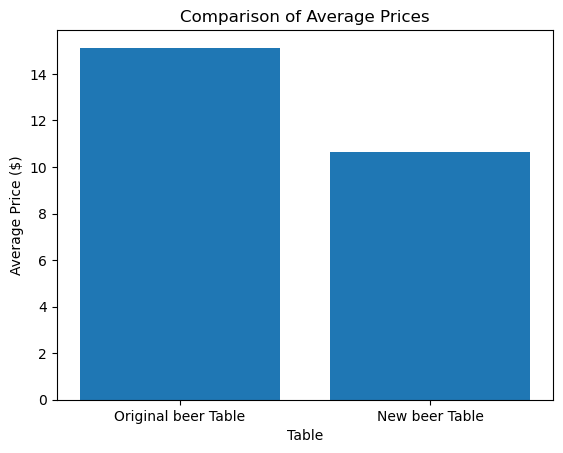

In [235]:
# Data for Avg Price comparison
categories = ['Original beer Table', 'New beer Table']
average_prices = [beer_avg_price, beers_average_price]

# Plotting the chart
plt.bar(categories, average_prices)
plt.xlabel('Table')
plt.ylabel('Average Price ($)')
plt.title('Comparison of Average Prices')

# Display the chart
plt.show()


In [236]:
#Find average ABV of new beers table
beers_average_abv = new_beers_df['ABV'].mean()
print("The average ABV of beers is:", beers_average_abv)


The average ABV of beers is: 7.464285714285714


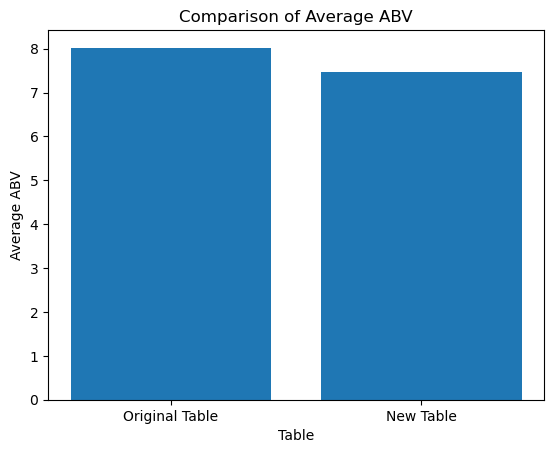

In [237]:
# Data for Avg ABV comparison
categories = ['Original Table', 'New Table']
average_abv = [beer_avg_abv, beers_average_abv]

# Plotting the chart
plt.bar(categories, average_abv)
plt.xlabel('Table')
plt.ylabel('Average ABV')
plt.title('Comparison of Average ABV')

# Display the chart
plt.show()


In [238]:
#Find average rating of new beers table
beers_average_rating = new_beers_df['Rating'].mean()
print("The average rating of beers is:", beers_average_rating)


The average rating of beers is: 3.0445714285714263


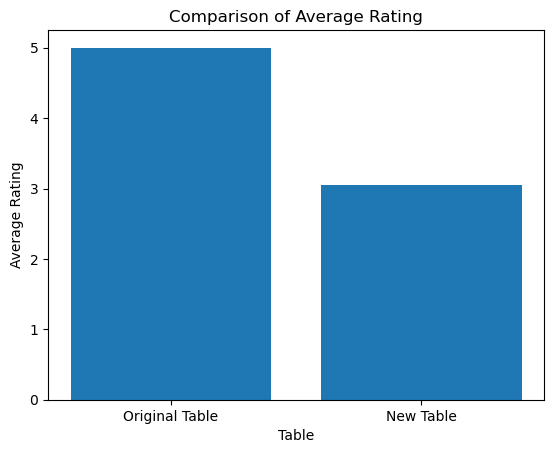

In [239]:
# Data for Average rating 
categories = ['Original Table', 'New Table']
average_rating = [beer_avg_rating, beers_average_rating]

# Plotting the chart
plt.bar(categories, average_rating)
plt.xlabel('Table')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Rating')

# Display the chart
plt.show()



## Find the best of the spirits
Finding Average Price, 
Average Rating, 
Average R/RC, 
Average (R/RC)/Price, 
And Average ABV listed. 

In [240]:
Spirits_data_df['Price'] = Spirits_data_df['Price'].str.replace('$', '').str.replace(',', '').astype(float)


c:\Users\jakes\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [241]:
Spirits_data_df['Price'] = Spirits_data_df['Price'].astype(float)

In [242]:
# Clean the ABV column by removing the percentage sign and converting to float
Spirits_data_df['ABV'] = Spirits_data_df['ABV'].str.replace('%', '').astype(float)

In [243]:
#Write code to find the Average Price of the Spirits
#CODE HERE
spirits_avg_price = Beer_data_df["Price"].mean()
print("The average price of spirits is:", spirits_avg_price)

The average price of spirits is: 15.12709030100325


In [244]:
#Write code to find the Average Rating of the Spirits
#CODE HERE
spirits_avg_rating = Spirits_data_df["Rating"].mean()
print("The average rating of spirits is:", spirits_avg_rating)

The average rating of spirits is: 4.934782608695651


In [245]:
#Write code to find the Average RC of the Spirits
#CODE HERE
spirits_avg_rc= Spirits_data_df["Rate Count"].mean()
print("The average rate count of spirits is:", spirits_avg_rc)

The average rate count of spirits is: 24.862876254180602


In [246]:
#Write code to find the Average R/RC of the Spirits
#CODE HERE
spirits_avg_rrc = spirits_avg_rating / spirits_avg_rc
print("The average rating/rate count of spirits is:", spirits_avg_rrc)

The average rating/rate count of spirits is: 0.1984799569545332


In [247]:
#Write code to find the Average (R/RC)/Price of the Spirits
#CODE HERE
spirits_worth = spirits_avg_rrc / spirits_avg_price
print("The worth of the spirits is:", spirits_worth)

The worth of the spirits is: 0.013120828461066946


In [248]:
#Write code to find the Average ABV of the Spirits
#CODE HERE
spirits_avg_abv = Spirits_data_df["ABV"].mean()
print("The average ABV count of spirits is:", spirits_avg_abv)

The average ABV count of spirits is: 34.15602006688962


#How to define the best chance of get a spirit is based off the (R/RC)/Price of Spirit to have a quantitative number to define how much money you spend per "star/1 rating". For spirits that is 1 dollar to .001 stars.

## Find the best of the Spirits after Machine learning
Finding Average Price, 
Average Rating, 
Average R/RC, 
Average (R/RC)/Price, 
And Average ABV/ABV’s listed. 

In [249]:
#Create a copy of the spirit's data for learning
combined_data_2_df = Spirits_data_df.copy()


In [250]:
# Define the characteristics of the new spirits
num_new_spirits = 700
spirit_names = ['Spirit A', 'Spirit B', 'Spirit C', 'Spirit D', 'Spirit E']
countries = ['Country A', 'Country B', 'Country C']
brands = ['Brand A', 'Brand B', 'Brand C']
categories = ['Category A', 'Category B', 'Category C']
tasting_notes = ['Note A', 'Note B', 'Note C']
abv_range = (30, 50)  # Alcohol by Volume range (minimum, maximum)
base_ingredient = ['Ingredient A', 'Ingredient B', 'Ingredient C']
years_aged_range = (1, 20)  # Years Aged range (minimum, maximum)
rating_range = (1.0, 5.0)  # Rating range (minimum, maximum)
rate_count_range = (10, 500)  # Rate Count range (minimum, maximum)
price_range = (10.0, 100.0)  # Price range (minimum, maximum)
volume = '750 mL'
description = 'Spirit description'



In [251]:
# Generate random spirits
new_spirits = []
for _ in range(num_new_spirits):
    spirit_name = np.random.choice(spirit_names)
    country = np.random.choice(countries)
    brand = np.random.choice(brands)
    category = np.random.choice(categories)
    tasting_note = np.random.choice(tasting_notes)
    abv = np.round(np.random.uniform(abv_range[0], abv_range[1]))
    base_ing = np.random.choice(base_ingredient)
    years_aged = np.random.randint(years_aged_range[0], years_aged_range[1] + 1)  # Add 1 to include the upper limit
    rating = np.round(np.random.uniform(rating_range[0], rating_range[1]), 1)
    rate_count = np.random.randint(rate_count_range[0], rate_count_range[1])
    price = np.round(np.random.uniform(price_range[0], price_range[1]), 2)
    
    new_spirits.append([
        spirit_name, country, brand, category, tasting_note, abv, base_ing, years_aged,
        rating, rate_count, price, volume, description
    ])

In [252]:
# Create a new DataFrame with the generated spirits
new_spirits_df = pd.DataFrame(
    new_spirits,
    columns=['Name', 'Country', 'Brand', 'Categories', 'Tasting Notes', 'ABV', 'Base Ingredient', 'Years Aged',
             'Rating', 'Rate Count', 'Price', 'Volume', 'Description']
)

In [253]:
#Find average price of new spirits table
spirits_average_price = new_spirits_df['Price'].mean()
print("The average price of spirits is:", spirits_average_price)

The average price of spirits is: 56.75637142857149


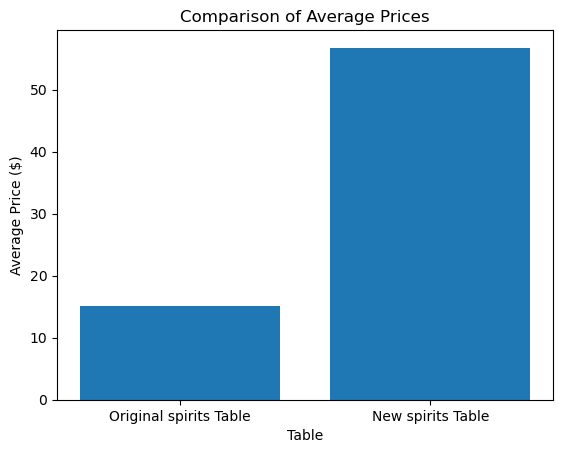

In [254]:
# Data for Avg Price comparison
categories = ['Original spirits Table', 'New spirits Table']
average_prices = [spirits_avg_price, spirits_average_price]

# Plotting the chart
plt.bar(categories, average_prices)
plt.xlabel('Table')
plt.ylabel('Average Price ($)')
plt.title('Comparison of Average Prices')

# Display the chart
plt.show()


In [255]:
#Find average ABV of new spirits table
spirits_average_abv = new_spirits_df['ABV'].mean()
print("The average ABV of spirits is:", spirits_average_abv)

The average ABV of spirits is: 40.364285714285714


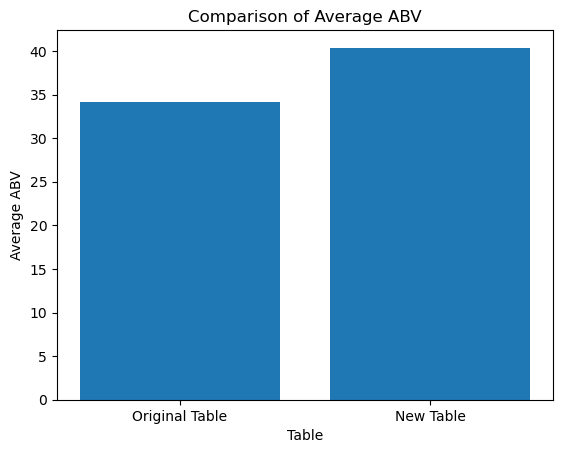

In [256]:
# Data for Avg ABV comparison
categories = ['Original Table', 'New Table']
average_abv = [spirits_avg_abv, spirits_average_abv]

# Plotting the chart
plt.bar(categories, average_abv)
plt.xlabel('Table')
plt.ylabel('Average ABV')
plt.title('Comparison of Average ABV')

# Display the chart
plt.show()

In [257]:
#Find average rating of new spirits table
spirits_average_rating = new_spirits_df['Rating'].mean()
print("The average rating of beers is:", spirits_average_rating)

The average rating of beers is: 2.9720000000000013


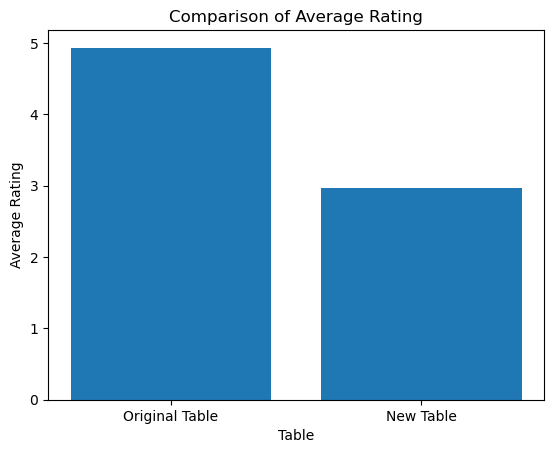

In [258]:
# Data for Average rating 
categories = ['Original Table', 'New Table']
average_rating = [spirits_avg_rating, spirits_average_rating]

# Plotting the chart
plt.bar(categories, average_rating)
plt.xlabel('Table')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Rating')

# Display the chart
plt.show()

## Find the best of the wine
Finding Average Price, 
Average Rating, 
Average R/RC, 
Average (R/RC)/Price, 
And Average ABV/ABV’s listed. 

In [259]:
Wine_data_df['Price'] = Wine_data_df['Price'].str.replace('$', '').astype(float)


c:\Users\jakes\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [260]:
# Clean the ABV column by removing the percentage sign and converting to float
Wine_data_df['ABV'] = Wine_data_df['ABV'].str.replace('%', '').astype(float)

In [261]:
#Write code to find the Average Price of the Wine
wine_avg_price = Wine_data_df["Price"].mean()
print("The average price of wine is:", wine_avg_price)


The average price of wine is: 49.611304347825964


In [262]:
#Write code to find the Average Rating of the Wine
wine_avg_rating = Wine_data_df["Rating"].mean()
print("The average rating of wine is:", wine_avg_rating)    

The average rating of wine is: 4.927090301003343


In [263]:
#Write code to find the Average R/RC of the Wine
#CODE HERE
wine_avg_rc= Wine_data_df["Rate Count"].mean()
print("The average rate count of wine is:", wine_avg_rc)

The average rate count of wine is: 13.22742474916388


In [264]:
#Write code to find the Average (R/RC)/Price of the Wine
#CODE HERE
wine_avg_rrc = wine_avg_rating / wine_avg_rc
print("The average rating/rate count of wine is:", wine_avg_rrc)

The average rating/rate count of wine is: 0.37249051833122615


In [265]:
#Write code to find the Average ABV of the Wine
#CODE HERE
wine_avg_abv = Wine_data_df["ABV"].mean()
print("The average ABV count of wine is:", wine_avg_abv)

The average ABV count of wine is: 12.968060200668894


## Find the best of the wine after Machine learning
Finding Average Price, 
Average Rating, 
Average R/RC, 
Average (R/RC)/Price, 
And Average ABV/ABV’s listed. 

In [266]:
#Create a copy of the wine's data for learning
combined_data_3_df = Wine_data_df.copy()

In [267]:
# Define the characteristics of the new wines
num_new_wines = 700
wine_names = ['Wine A', 'Wine B', 'Wine C', 'Wine D', 'Wine E']
countries = ['Country A', 'Country B', 'Country C']
brands = ['Brand A', 'Brand B', 'Brand C']
categories = ['Category A', 'Category B', 'Category C']
tasting_notes = ['Note A', 'Note B', 'Note C']
abv_range = (10, 15)  # Alcohol by Volume range (minimum, maximum)
food_pairing = ['Food Pairing A', 'Food Pairing B', 'Food Pairing C']
glassware = ['Glassware A', 'Glassware B', 'Glassware C']
serving_temp_list = ['Chilled', 'Cellar Temperature', 'Room Temperature']
sweet_dry_scale = ['Sweet', 'Dry']
body = ['Light', 'Medium', 'Full']
rating_range = (1.0, 5.0)  # Rating range (minimum, maximum)
rate_count_range = (10, 500)  # Rate Count range (minimum, maximum)
price_range = (10.0, 100.0)  # Price range (minimum, maximum)
volume = '750 mL'
description = 'Wine description'

In [268]:
# Generate random wines
new_wines = []
for _ in range(num_new_wines):
    wine_name = np.random.choice(wine_names)
    country = np.random.choice(countries)
    brand = np.random.choice(brands)
    category = np.random.choice(categories)
    tasting_note = np.random.choice(tasting_notes)
    abv = np.round(np.random.uniform(abv_range[0], abv_range[1]), 1)
    food_pair = np.random.choice(food_pairing)
    glass = np.random.choice(glassware)
    serving_temp = np.random.choice(serving_temp_list)
    sweet_dry = np.random.choice(sweet_dry_scale)
    wine_body = np.random.choice(body)
    rating = np.round(np.random.uniform(rating_range[0], rating_range[1]), 1)
    rate_count = np.random.randint(rate_count_range[0], rate_count_range[1])
    price = np.round(np.random.uniform(price_range[0], price_range[1]), 2)
    
    new_wines.append([
        wine_name, country, brand, category, tasting_note, abv, food_pair, glass, serving_temp,
        sweet_dry, wine_body, rating, rate_count, price, volume, description
    ])


In [269]:
# Create a new DataFrame with the generated wines
new_wines_df = pd.DataFrame(
    new_wines,
    columns=['Name', 'Country', 'Brand', 'Categories', 'Tasting Notes', 'ABV', 'Food Pairing', 'Suggested Glassware',
             'Suggested Serving Temperature', 'Sweet-Dry Scale', 'Body', 'Rating', 'Rate Count', 'Price', 'Volume', 'Description']
)

In [270]:
#Find average price of new wine table
wines_average_price = new_wines_df['Price'].mean()
print("The average price of spirits is:", wines_average_price)


The average price of spirits is: 54.35484285714279


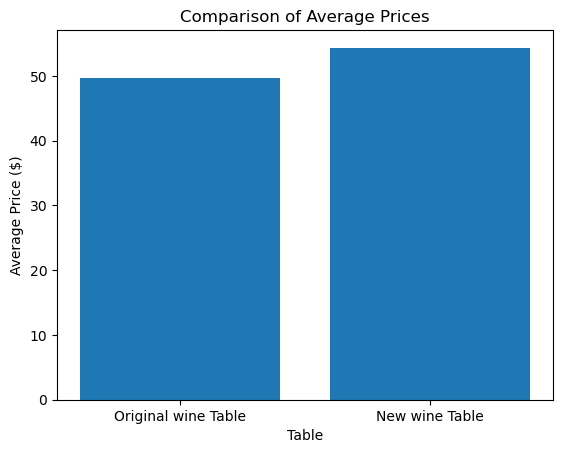

In [283]:
# Data for Avg Price comparison
categories = ['Original wine Table', 'New wine Table']
average_prices = [wine_avg_price, wines_average_price]

# Plotting the chart
plt.bar(categories, average_prices)
plt.xlabel('Table')
plt.ylabel('Average Price ($)')
plt.title('Comparison of Average Prices')

# Display the chart
plt.show()

In [285]:
#Find average ABV of new wine table
wines_average_abv = new_wines_df['ABV'].mean()
print("The average ABV of wines is:", wines_average_abv)

The average ABV of wines is: 12.513714285714276


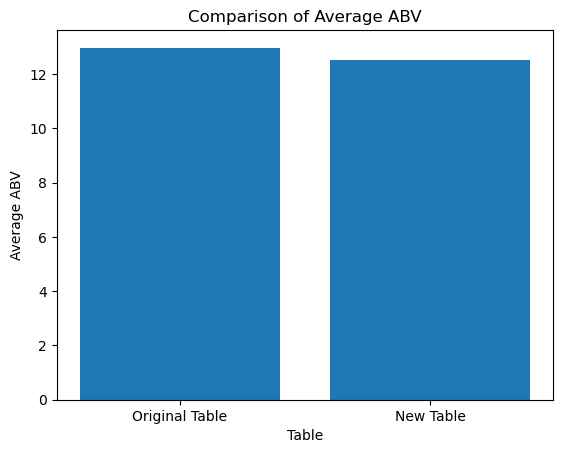

In [286]:
# Data for Avg ABV comparison
categories = ['Original Table', 'New Table']
average_abv = [wine_avg_abv, wines_average_abv]

# Plotting the chart
plt.bar(categories, average_abv)
plt.xlabel('Table')
plt.ylabel('Average ABV')
plt.title('Comparison of Average ABV')

# Display the chart
plt.show()

In [288]:
#Find average rating of new wines table
new_wines_average_rating = new_wines_df['Rating'].mean()
print("The average rating of wines is:", new_wines_average_rating)


The average rating of wines is: 3.032857142857142


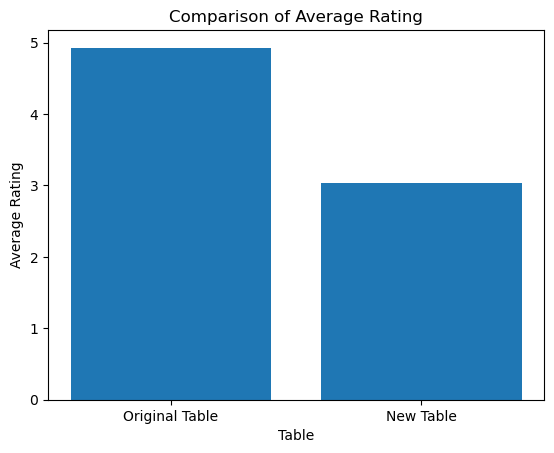

In [289]:
# Data for Average rating 
categories = ['Original Table', 'New Table']
average_rating = [wine_avg_rating, new_wines_average_rating]

# Plotting the chart
plt.bar(categories, average_rating)
plt.xlabel('Table')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Rating')

# Display the chart
plt.show()

In [290]:
new_beers_df.to_csv('new_beers.csv', index=False)
new_spirits_df.to_csv('new_spirits.csv', index=False)
new_wines_df.to_csv('new_wines.csv', index=False)


## Show plots and diagrams of the comparisons


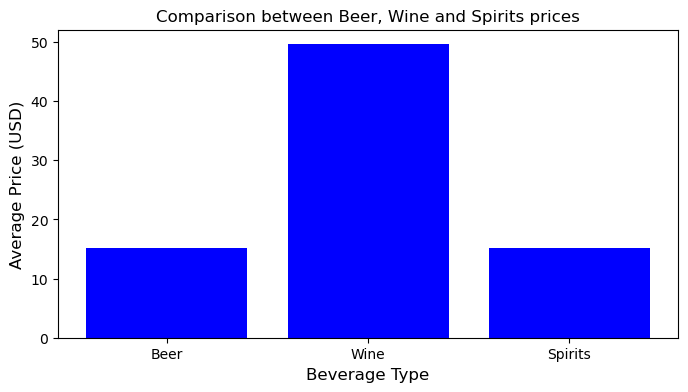

In [272]:
## Compare the average prices between the Beer, Wine and Sprits and illustrate it 
import matplotlib.pyplot as plt

# Create a list of the average prices for each beverage type
avg_prices = [beer_avg_price, wine_avg_price, spirits_avg_price]

# Create a list of the beverage types
beverage_types = ['Beer', 'Wine', 'Spirits']

plt.figure(figsize=(8, 4))

plt.bar(beverage_types, avg_prices, color="blue")

plt.title("Comparison between Beer, Wine and Spirits prices", fontsize=12)
plt.xlabel("Beverage Type", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)

plt.show()



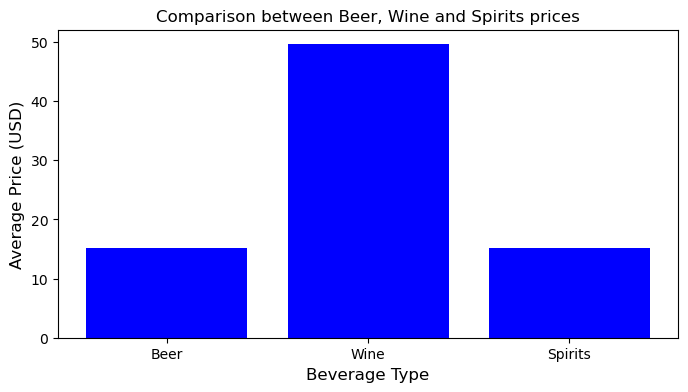

In [273]:
# Create a list of the average prices for each beverage type
avg_prices_new = [beer_avg_price, wine_avg_price, spirits_avg_price]

# Create a list of the beverage types
beverage_types = ['Beer', 'Wine', 'Spirits']

plt.figure(figsize=(8, 4))

plt.bar(beverage_types, avg_prices, color="blue")

plt.title("Comparison between Beer, Wine and Spirits prices", fontsize=12)
plt.xlabel("Beverage Type", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)

plt.show()


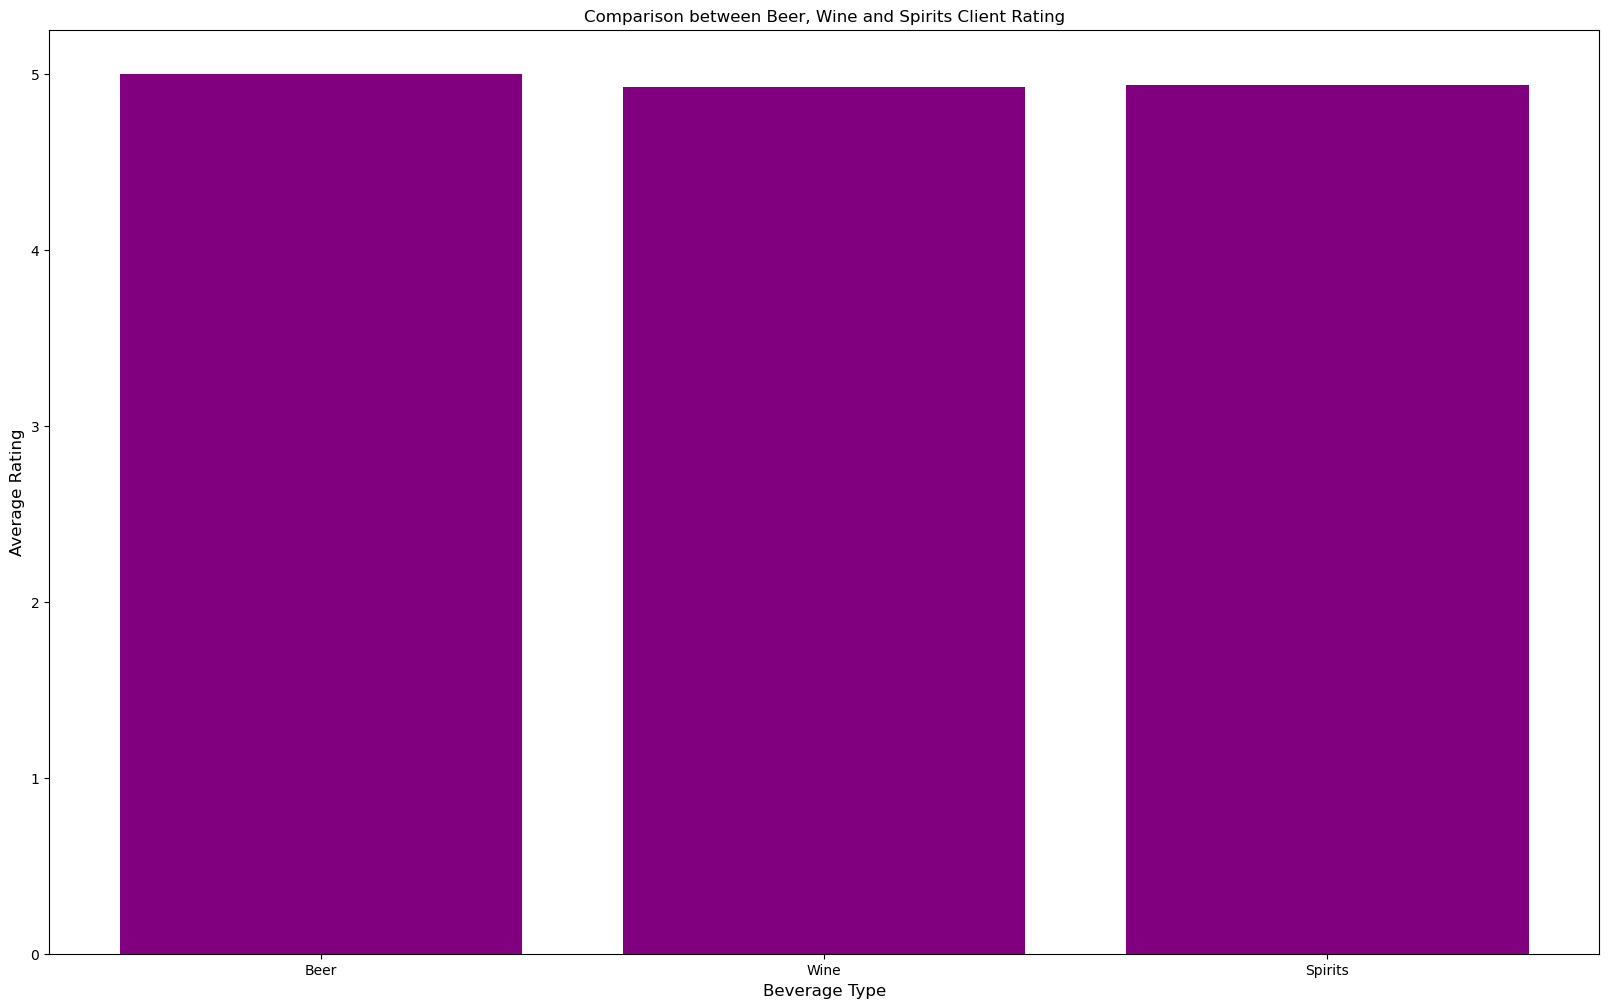

In [274]:

# Create a list of the average prices for each beverage type
avg_rating = [beer_avg_rating, wine_avg_rating, spirits_avg_rating]

# Create a list of the beverage types
beverage_types = ['Beer', 'Wine', 'Spirits']

plt.figure(figsize=(20, 12))

plt.bar(beverage_types, avg_rating, color="purple")

plt.title("Comparison between Beer, Wine and Spirits Client Rating", fontsize=12)
plt.xlabel("Beverage Type", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

plt.show()


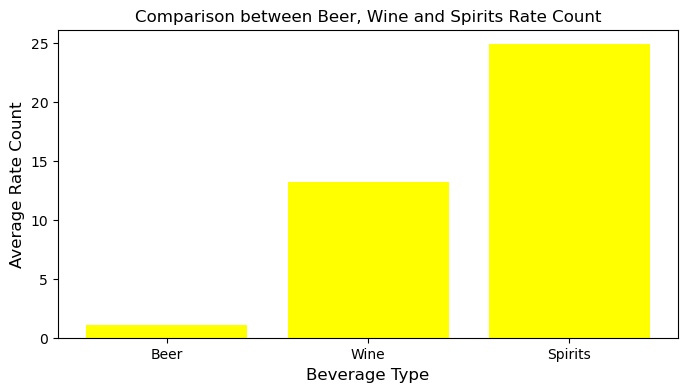

In [275]:
# Create a list of the average rating for each beverage type
avg_rc = [beer_avg_rc, wine_avg_rc, spirits_avg_rc]

# Create a list of the beverage types
beverage_types = ['Beer', 'Wine', 'Spirits']

plt.figure(figsize=(8, 4))

plt.bar(beverage_types, avg_rc, color="Yellow")

plt.title("Comparison between Beer, Wine and Spirits Rate Count", fontsize=12)
plt.xlabel("Beverage Type", fontsize=12)
plt.ylabel("Average Rate Count", fontsize=12)

plt.show()


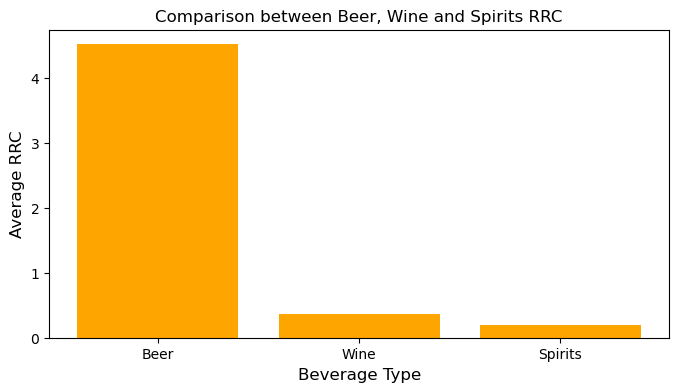

In [276]:
# Create a list of the average rating for each beverage type
avg_rrc = [beer_avg_rrc, wine_avg_rrc, spirits_avg_rrc]

# Create a list of the beverage types
beverage_types = ['Beer', 'Wine', 'Spirits']

plt.figure(figsize=(8, 4))

plt.bar(beverage_types, avg_rrc, color="Orange")

plt.title("Comparison between Beer, Wine and Spirits RRC", fontsize=12)
plt.xlabel("Beverage Type", fontsize=12)
plt.ylabel("Average RRC", fontsize=12)

plt.show()



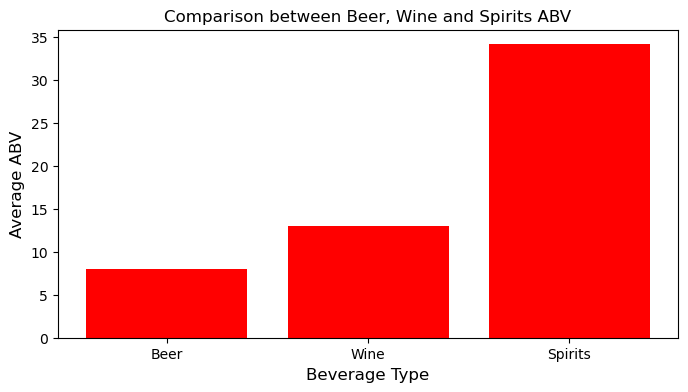

In [277]:
# Create a list of the average rating for each beverage type
avg_abv = [beer_avg_abv, wine_avg_abv, spirits_avg_abv]

# Create a list of the beverage types
beverage_types = ['Beer', 'Wine', 'Spirits']

plt.figure(figsize=(8, 4))

plt.bar(beverage_types, avg_abv, color="Red")

plt.title("Comparison between Beer, Wine and Spirits ABV", fontsize=12)
plt.xlabel("Beverage Type", fontsize=12)
plt.ylabel("Average ABV", fontsize=12)

plt.show()



In [278]:

# Prices comparison per brand in beer 
average_prices_beer = Beer_data_df.groupby('Brand')['Price'].mean()
print(average_prices_beer)


Brand
Evil Twin                    18.343554
Mikkeller                    13.853692
Pipeworks Brewing Company    12.415398
Name: Price, dtype: float64


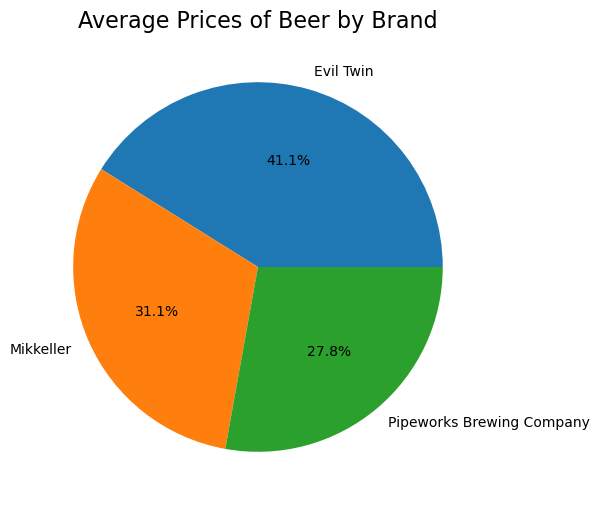

In [279]:
plt.figure(figsize=(8, 6))
plt.pie(average_prices_beer, labels=average_prices_beer.index, autopct='%1.1f%%')
plt.title('Average Prices of Beer by Brand', fontsize=16)
plt.show()



In [280]:
# Prices comparison per brand in beer 
average_prices_beer = Beer_data_df.groupby('Brand')['Price'].mean()
print(average_prices_beer)

Brand
Evil Twin                    18.343554
Mikkeller                    13.853692
Pipeworks Brewing Company    12.415398
Name: Price, dtype: float64


Brand
90 Cellars                   14.727941
Barefoot                     11.149737
Beringer Vineyards           27.209677
Domaine Drouhin              54.888966
Francis Ford Coppola         18.956216
Kenwood                      17.633636
Louis Jadot                  62.906667
Louis Latour                 52.290417
M. Chapoutier               134.955385
Veuve Clicquot Champagne    151.856486
Vineyard Block Estate        24.690000
Name: Price, dtype: float64


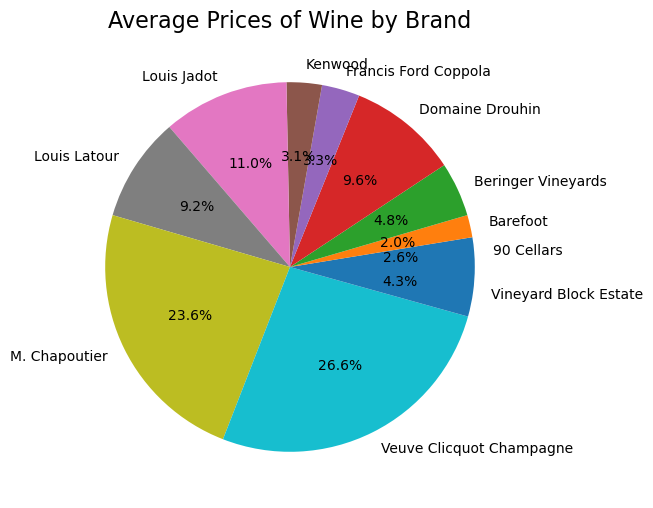

In [281]:
# Prices comparison per brand in wine
average_prices_wine = Wine_data_df.groupby('Brand')['Price'].mean()
print(average_prices_wine)

plt.figure(figsize=(8, 6))
plt.pie(average_prices_wine, labels=average_prices_wine.index, autopct='%1.1f%%')
plt.title('Average Prices of Wine by Brand', fontsize=16)
plt.show()
 

Brand
Bacardi Rum          20.435094
DeKuyper Liqueur     12.265937
Gordon  MacPhail    964.095556
Jack Daniels         50.166458
Johnnie Walker      611.508718
Jose Cuervo          19.287500
Smirnoff Vodka       15.465686
Name: Price, dtype: float64


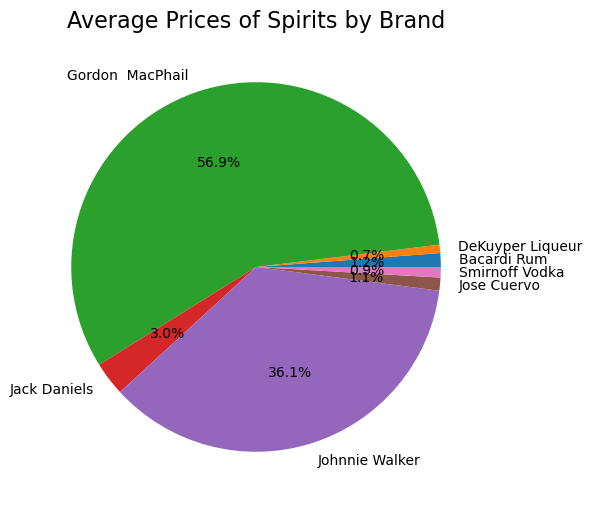

In [282]:
# Prices comparison per brand in spirits
average_prices_spirits = Spirits_data_df.groupby('Brand')['Price'].mean()
print(average_prices_spirits)


plt.figure(figsize=(8, 6))
plt.pie(average_prices_spirits, labels=average_prices_spirits.index, autopct='%1.1f%%')
plt.title('Average Prices of Spirits by Brand', fontsize=16)
plt.show()

## How to define the best chance of get a spirit is based off the (R/RC)/Price of Spirit to have a quantitative number to define how much money you spend per "star/1 rating". For spirits that is 1 dollar to 0.372 stars.